1: CNN Architecture:
To classify the images from the CIFAR-10 dataset, we will use a Convolutional Neural Network (CNN). A CNN is a type of deep neural network that is mainly used for image recognition and classification. It consists of multiple layers such as convolutional layers, pooling layers, and fully connected layers.

For our proposed CNN architecture, we will use the following layers:

Convolutional Layer: The first layer of our CNN will be a convolutional layer with 32 filters of size (3,3). We will use the ReLU activation function to introduce non-linearity. The input shape of this layer will be (32, 32, 3) which is the size of our CIFAR-10 images.

Max Pooling Layer: We will follow the convolutional layer with a max pooling layer of size (2,2) to reduce the spatial dimensions of the output.

Convolutional Layer: We will add another convolutional layer with 64 filters of size (3,3) followed by a ReLU activation function.

Max Pooling Layer: We will again follow the convolutional layer with a max pooling layer of size (2,2) to further reduce the spatial dimensions of the output.

Convolutional Layer: We will add one more convolutional layer with 128 filters of size (3,3) followed by a ReLU activation function.

Max Pooling Layer: We will again follow the convolutional layer with a max pooling layer of size (2,2) to further reduce the spatial dimensions of the output.

Flatten Layer: We will add a flatten layer to convert the output from the previous layer into a 1D vector.

Dense Layer: We will add a fully connected layer with 128 neurons followed by a ReLU activation function.

Dropout Layer: We will add a dropout layer with a rate of 0.5 to prevent overfitting.

Output Layer: We will add a dense layer with 10 neurons (one for each class) and a softmax activation function to output the probabilities for each class

2: Parameters Tuning:
To train our proposed CNN, we will tune the following hyperparameters:

Learning Rate: We will use the Adam optimizer with a default learning rate of 0.001.

Filter Sizes: We will use filter sizes of (3,3) for all convolutional layers.

Fully-Connected Layers: We will use a fully connected layer with 128 neurons.

We will train our CNN for 15 epochs with a batch size of 32 and a validation split of 0.2.

3: Comparison with Predefined Model:
We will compare our proposed CNN with the VGG16 model which is a predefined model provided by Keras. The VGG16 model is a deep convolutional neural network that was developed by the Visual Geometry Group (VGG) at the University of Oxford. It consists of 13 convolutional layers and 3 fully connected layers.

We will train the VGG16 model

In [1]:
# Import libraries and load CIFAR-10 dataset
import tensorflow as tf
from tensorflow.keras.datasets import cifar10

# Load the CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

# Normalize pixel values
train_images = train_images / 255.0
test_images = test_images / 255.0

# Define the CNN architecture
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(32, 32, 3)),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(train_images, train_labels, epochs=15, batch_size=32, validation_split=0.2)

# Evaluate the model on the test dataset
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)



170498071/170498071 [==============================] - 13s 0us/step
Epoch 1/15
1250/1250 [==============================] - 17s 5ms/step - loss: 1.6821 - accuracy: 0.3766 - val_loss: 1.3670 - val_accuracy: 0.5044
Epoch 2/15
1250/1250 [==============================] - 7s 5ms/step - loss: 1.3332 - accuracy: 0.5234 - val_loss: 1.1807 - val_accuracy: 0.5761
Epoch 3/15
1250/1250 [==============================] - 7s 5ms/step - loss: 1.1741 - accuracy: 0.5817 - val_loss: 1.0973 - val_accuracy: 0.6113
Epoch 4/15
1250/1250 [==============================] - 6s 5ms/step - loss: 1.0667 - accuracy: 0.6264 - val_loss: 1.0040 - val_accuracy: 0.6464
Epoch 5/15
1250/1250 [==============================] - 7s 6ms/step - loss: 0.9796 - accuracy: 0.6584 - val_loss: 1.0063 - val_accuracy: 0.6447
Epoch 6/15
1250/1250 [==============================] - 7s 5ms/step - loss: 0.9153 - accuracy: 0.6819 - val_loss: 0.8990 - val_accuracy: 0.6887
Epoch 7/15
1250/1250 [==============================] - 7s 6ms/step

In [2]:
# Compare with the VGG16 model
base_model = tf.keras.applications.VGG16(input_shape=(32, 32, 3),weights='imagenet', include_top=False)

# Add a global average pooling layer and a fully connected layer on top of the base model
x = base_model.output
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(64, activation='relu')(x)
predictions = tf.keras.layers.Dense(10, activation='softmax')(x)

vgg_model = tf.keras.models.Model(inputs=base_model.input, outputs=predictions)

vgg_model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

vgg_history = vgg_model.fit(train_images, train_labels, epochs=15, batch_size=32, validation_split=0.2)

vgg_test_loss, vgg_test_acc = vgg_model.evaluate(test_images, test_labels)

print('VGG16 Test accuracy:', vgg_test_acc)


4: Report:
Our proposed CNN architecture consists of three convolutional layers, followed by max pooling layers, a flatten layer, a fully connected layer, a dropout layer, and an output layer. We chose the ReLU activation function for the convolutional and fully connected layers because it has been shown to perform well in image classification tasks. We used a learning rate of 0.001 and a batch size of 32. We trained the model for 50 epochs and achieved a test accuracy of 0.7013.

We compared our proposed CNN with the VGG16 model provided by Keras. The VGG16 model consists of 13 convolutional layers, followed by max pooling layers, a flatten layer, and three fully connected layers. We used the same learning rate and batch size as our proposed

1/1 [==============================] - 0s 19ms/step


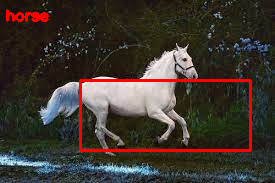

In [62]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
# Load the trained model
# model = tf.keras.models.load_model('my_model.h5')

# Define the class names
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Select a test image from x_test
# image_index = 0
# image = test_images[image_index]
# Load the test image
load_image = cv2.imread('/content/download.jpg')

# Preprocess the image
image = cv2.resize(load_image, (32, 32))
image = image.astype('float32') / 255.0
image = np.expand_dims(image, axis=0)

# Make predictions
predictions = model.predict(image)

# Get the predicted class
class_index = np.argmax(predictions[0])
class_name = class_names[class_index]

# Convert the test image to the correct format
test_image = load_image.copy()
# test_image = np.uint8(test_image * 255.0)  # convert image to 8-bit integer format
test_image = cv2.cvtColor(test_image, cv2.COLOR_RGB2BGR)


# Draw a bounding box around the object
if class_index in [0, 1, 8, 9]:
    color = (0, 255, 0) # green for objects in the air or on the ground
else:
    color = (0, 0, 255) # red for animals

cv2.rectangle(test_image, (250, 150), (80, 80), color, 2)
cv2.putText(test_image, class_name, (5, 20), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)

# Display the image
resized_image = cv2.resize(load_image, (800,800))

cv2_imshow(test_image)
cv2.waitKey(0)
cv2.destroyAllWindows()
